In [46]:
# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Core libraries imported successfully!")

Core libraries imported successfully!


In [47]:
#import TensorFlow and keras
import tensorflow as tf
import keras
from keras import layers, models, optimizers, losses, metrics

#check versions
print(f"Tensorflow Version:{tf.__version__}")
print(f"Keras version:{keras.__version__}")
print(f"keras backend:{keras.backend.backend()}")

#set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("\n✓ keras is ready to use")

Tensorflow Version:2.19.0
Keras version:3.10.0
keras backend:tensorflow

✓ keras is ready to use


#Import Data

In [48]:
from keras.datasets import mnist

#Load Data
(X_train, y_train), (X_test, y_test)=mnist.load_data()

print("Dataset loaded successfully!:")
print(f"\nTraining Samples:{X_train.shape[0]}")
print(f"Testing Samples:{X_test.shape[0]}")
print(f"Image Shape:{X_train.shape[1:]}")
print(f"Number of classes:{np.unique(y_train)}")

Dataset loaded successfully!:

Training Samples:60000
Testing Samples:10000
Image Shape:(28, 28)
Number of classes:[0 1 2 3 4 5 6 7 8 9]


#Visualize some samples

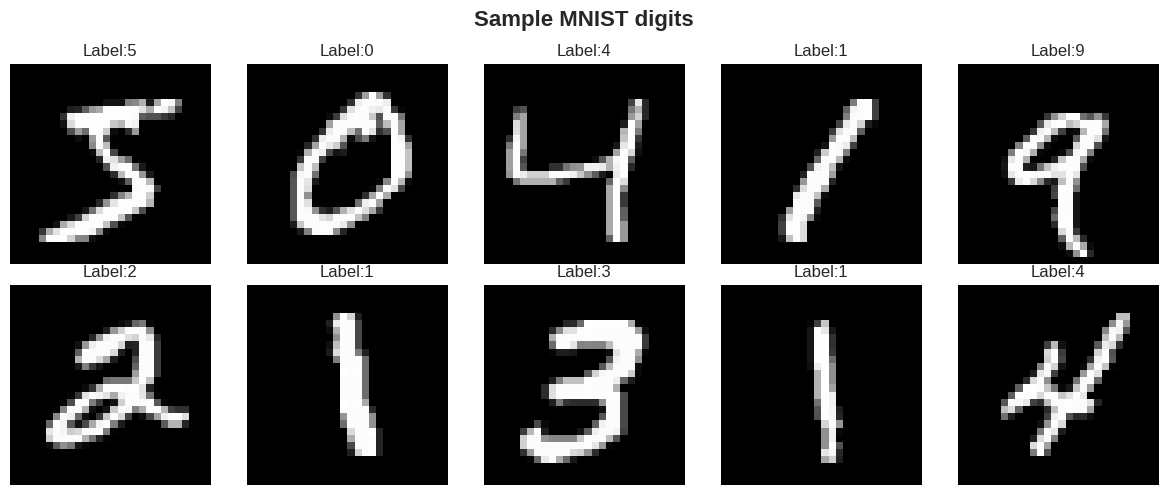

Each image is a 28x28 pixel greyscale image of hand written digit(0-9)


In [49]:
fig, axes=plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample MNIST digits', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
  ax.imshow(X_train[i], cmap='gray')
  ax.set_title(f"Label:{y_train[i]}")
  ax.axis('off')

plt.tight_layout()
plt.show()

print("Each image is a 28x28 pixel greyscale image of hand written digit(0-9)")

#Data Preprocessing

In [50]:
X_train_flat=X_train.reshape(X_train.shape[0], -1)
X_test_flat=X_test.reshape(X_test.shape[0], -1)

print(f"Original Shape: {X_train.shape}")
print(f"Falttened Shape: {X_train_flat.shape}")
print(f"Each Image is now a vector of {X_train_flat.shape[1]} samples")

Original Shape: (60000, 28, 28)
Falttened Shape: (60000, 784)
Each Image is now a vector of 784 samples


Normalize the pixel values

In [51]:
X_train_norm=X_train_flat.astype('float32')/255.0
X_test_norm=X_test_flat.astype('float32')/255.0

print(f"Original pixel range:[{X_train_flat.min()}, {X_train_flat.max()}]")
print(f"Normalized pixel range:[{X_train_norm.min()}, {X_train_norm.max()}]")
print("\n✓ Data Normalized successfully")

Original pixel range:[0, 255]
Normalized pixel range:[0.0, 1.0]

✓ Data Normalized successfully


Convert Labels to categorical

In [52]:
from keras.utils import to_categorical

print(f"Original Labels:{y_train[:5]}")
y_train_cat=to_categorical(y_train, num_classes=10)
y_test_cat=to_categorical(y_test, num_classes=10)

print(f"One Hot encoded label for {y_train[1]}:")
print(f"    {y_train_cat[1]}")
print(f"Label Shape:{y_train_cat.shape}")

Original Labels:[5 0 4 1 9]
One Hot encoded label for 0:
    [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label Shape:(60000, 10)


#Multi Class Classification

In [53]:
print("Data Shapes:")
print(f"    X_train:{X_train_norm.shape}")
print(f"    y_train:{y_train_cat.shape}")
print(f"    X_test:{X_test_norm.shape}")
print(f"    y_test:{y_test_cat.shape}")
print("\n✓ Data ready for multi-class classification !")

Data Shapes:
    X_train:(60000, 784)
    y_train:(60000, 10)
    X_test:(10000, 784)
    y_test:(10000, 10)

✓ Data ready for multi-class classification !


Build MNIST classifier

In [54]:
mnist_model=keras.Sequential([
    #Input layer + First Hidden layer
    layers.Dense(256, input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    #Second Hidden layer
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    #Third Hidden layer
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),

    #Output layer
    layers.Dense(10, activation='softmax')
], name='mnist_classifier')
mnist_model.summary()

Model: "mnist_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,298 (954.29 KB)

 Trainable params: 243,530 (951.29 KB)

 Non-trainable params: 768 (3.00 KB)

Compile the model

In [55]:
mnist_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✓ Model Compiled and ready for Training")

✓ Model Compiled and ready for Training


#Train the model

In [56]:
history_mnist=mnist_model.fit(
    X_train_norm,
    y_train_cat,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

print("n✓ Model training completed !")

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7505 - loss: 0.7976 - val_accuracy: 0.9618 - val_loss: 0.1277
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9310 - loss: 0.2324 - val_accuracy: 0.9743 - val_loss: 0.0888
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9477 - loss: 0.1779 - val_accuracy: 0.9763 - val_loss: 0.0810
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9556 - loss: 0.1489 - val_accuracy: 0.9753 - val_loss: 0.0774
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9613 - loss: 0.1272 - val_accuracy: 0.9790 - val_loss: 0.0680
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9679 - loss: 0.1098 - val_accuracy: 0.9810 - val_loss: 0.0672
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9701 - loss: 0.0978 - val_accuracy: 0.9807 - val_loss: 0.0643
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9726 - loss: 0.0890 - val_accu

Visualize Model Training history

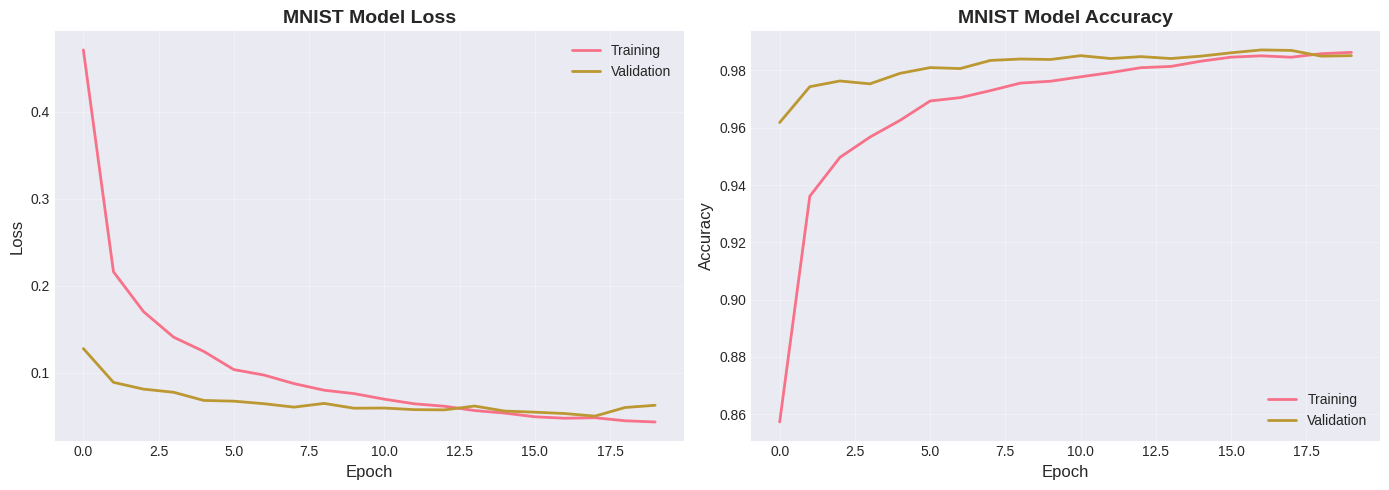

In [57]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(14, 5))

#Loss
ax1.plot(history_mnist.history['loss'], label='Training', linewidth=2)
ax1.plot(history_mnist.history['val_loss'], label='Validation', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('MNIST Model Loss', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

#Accuracy
ax2.plot(history_mnist.history['accuracy'], label='Training', linewidth=2)
ax2.plot(history_mnist.history['val_accuracy'], label='Validation', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('MNIST Model Accuracy', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Test Evaluation

In [58]:
test_loss, test_accuaracy=mnist_model.evaluate(X_test_norm, y_test_cat, verbose=0)

print('📊 Final Test Results:')
print(f" Loss:{test_loss:.4f}")
print(f" Test Accuracy:{test_accuaracy:.4f} ({(test_accuaracy*100):.2f}%)")

📊 Final Test Results:
 Loss:0.0622
 Test Accuracy:0.9827 (98.27%)


Make Predictions

In [59]:
predictions_mnist=mnist_model.predict(X_test_norm, verbose=0)

#Convert from one-hot to class labels
predicted_classes=np.argmax(predictions_mnist, axis=1)
true_classes=np.argmax(y_test_cat, axis=1)

print("Sample Predictions:")
print(f"True Classes:     {true_classes[:10]}")
print(f"Predicted Classes:{predicted_classes[:10]}")

Sample Predictions:
True Classes:     [7 2 1 0 4 1 4 9 5 9]
Predicted Classes:[7 2 1 0 4 1 4 9 5 9]


Visualize Predictions

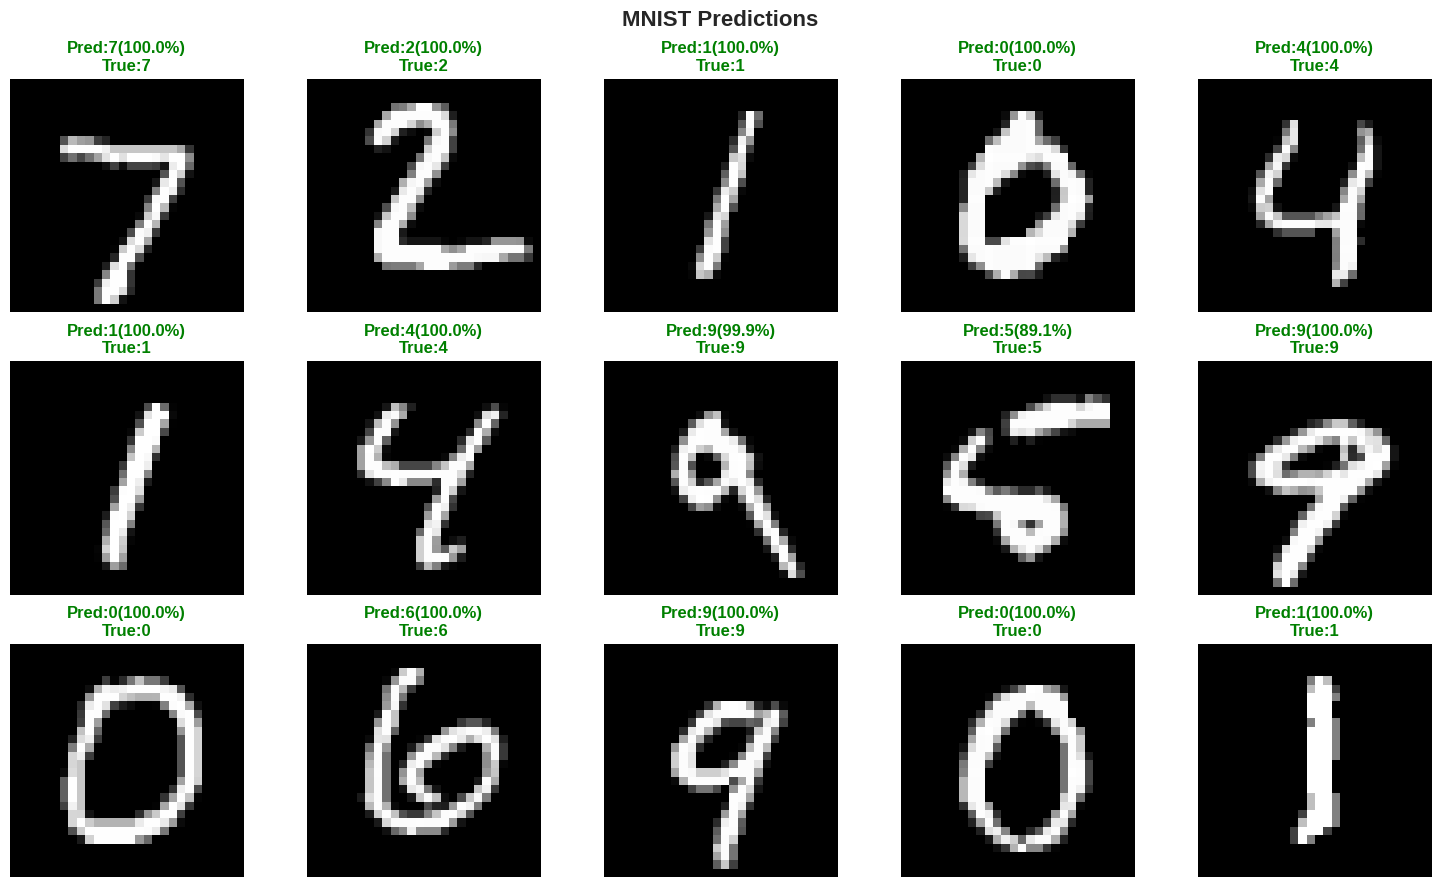

Green = Correct, Red = Incorrect


In [62]:
fig, axes=plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('MNIST Predictions', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
  ax.imshow(X_test[i], cmap='gray')

  #Color based on correctness
  color='green' if predicted_classes[i]==true_classes[i] else 'red'
  confidence=predictions_mnist[i][predicted_classes[i]]*100

  ax.set_title(f"Pred:{predicted_classes[i]}({confidence:.1f}%)\nTrue:{true_classes[i]}", color=color, fontweight='bold')
  ax.axis('off')

plt.tight_layout()
plt.show()

print("Green = Correct, Red = Incorrect")

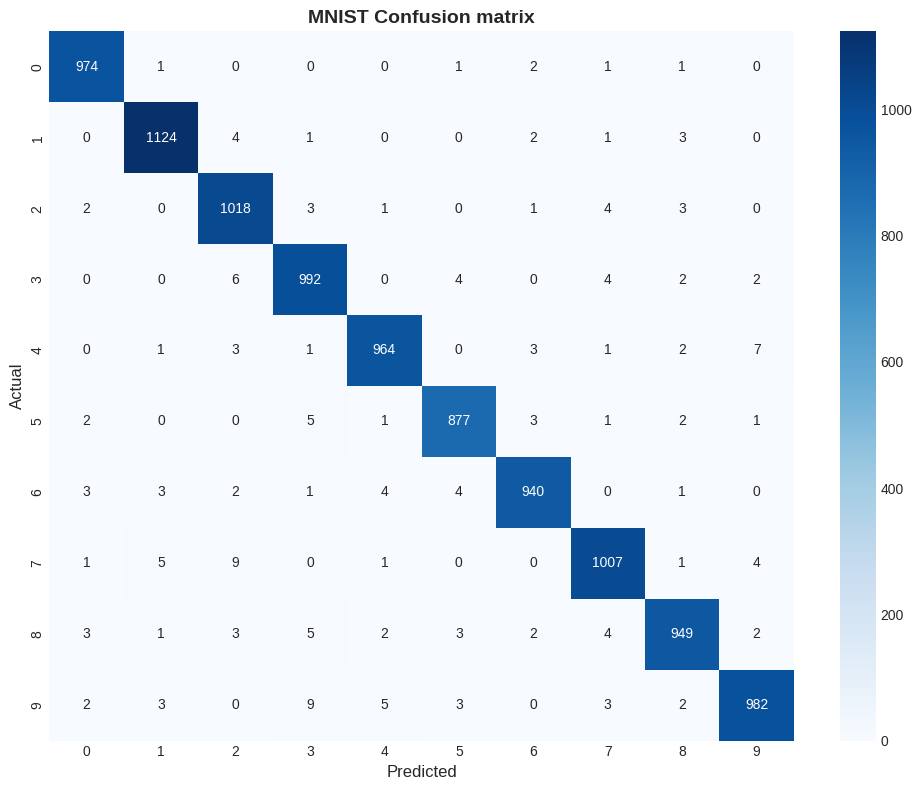

Diagonal Values are correct predictions
Off-diagonal values are errors


In [64]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("MNIST Confusion matrix", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Diagonal Values are correct predictions")
print("Off-diagonal values are errors")

Analyzing Errors

Total Mis-classified:10000/10000
Mis-classified_percentage:1.00


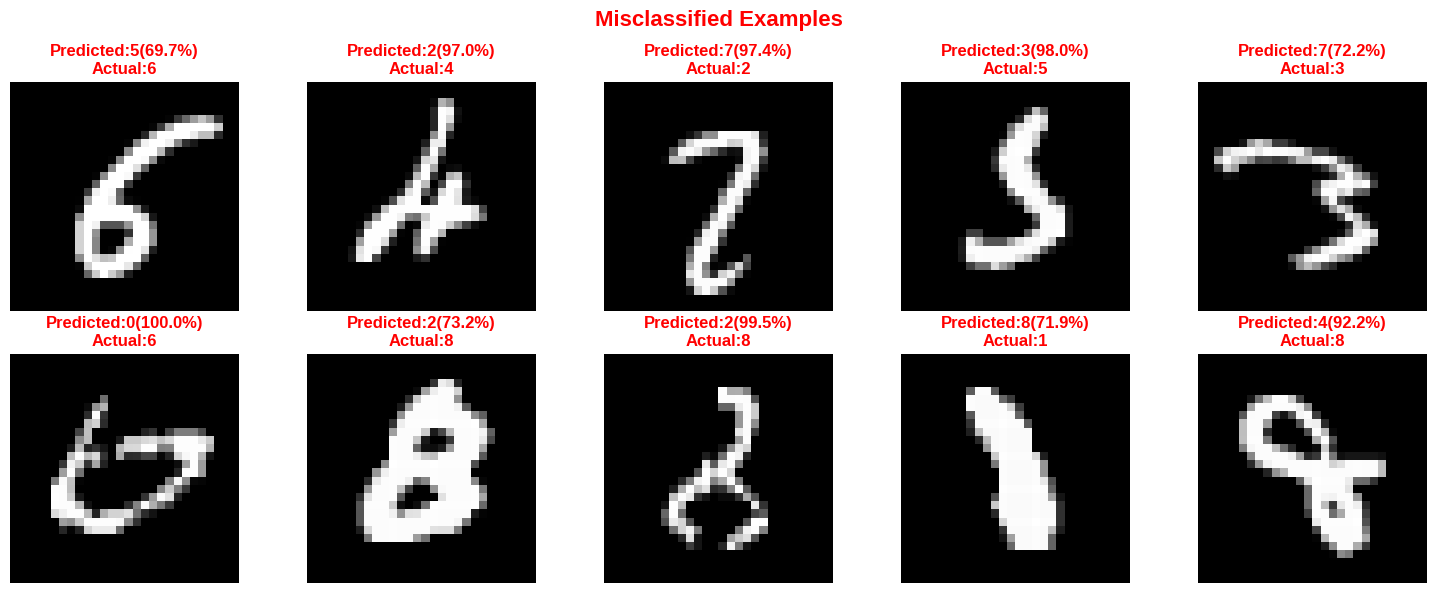

In [65]:
misclassified_idx=np.where(predicted_classes!=true_classes)[0]


print(f"Total Mis-classified:{len(predicted_classes)}/{len(true_classes)}")
print(f"Mis-classified_percentage:{(len(predicted_classes)/len(true_classes)):.2f}")

#Show some errors
if len(misclassified_idx)>0:
  fig, axes=plt.subplots(2, 5, figsize=(15, 6))
  fig.suptitle("Misclassified Examples", fontsize=16, fontweight='bold', color='red')

  for i, ax in enumerate(axes.flat):
    if i<len(misclassified_idx):
      idx=misclassified_idx[i]
      ax.imshow(X_test[idx], cmap='grey')
      confidence=predictions_mnist[idx][predicted_classes[idx]]*100
      ax.set_title(f"Predicted:{predicted_classes[idx]}({confidence:.1f}%)\nActual:{true_classes[idx]}",
                   color='red', fontweight='bold')
      ax.axis('off')

plt.tight_layout()
plt.show()